<a href="https://colab.research.google.com/github/SilverIsle/Oasis-Infobyte/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from zipfile import ZipFile
zip=ZipFile('archive_0.zip')
zip.extractall()

In [ ]:
def act_pred_plot(y_test, y_pred):
  plt.scatter(y_test, y_pred)
  plt.xlabel('Actual Sales')
  plt.ylabel('Predicted Sales')
  plt.title('Actual vs. Predicted Sales')
  plt.show()

In [ ]:
def residuals(y_test, y_pred):
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals)
  plt.xlabel('Predicted Sales')
  plt.ylabel('Residuals')
  plt.title('Residuals Plot')
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()


In [ ]:
def data_viz(data):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].scatter(data['TV'], data['Sales'], color='blue')
  axs[0].set_title('TV vs Sales')
  axs[0].set_xlabel('TV Advertising')
  axs[0].set_ylabel('Sales')

  axs[1].scatter(data['Radio'], data['Sales'], color='green')
  axs[1].set_title('Radio vs Sales')
  axs[1].set_xlabel('Radio Advertising')
  axs[1].set_ylabel('Sales')

  axs[2].scatter(data['Newspaper'], data['Sales'], color='red')
  axs[2].set_title('Newspaper vs Sales')
  axs[2].set_xlabel('Newspaper Advertising')
  axs[2].set_ylabel('Sales')

  plt.tight_layout()
  plt.show()

In [ ]:
data=pd.read_csv('Advertising.csv')
nan_rows = data[data.isna().any(axis=1)]
data=data.dropna() # data preprocessing
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
data.shape

(200, 5)

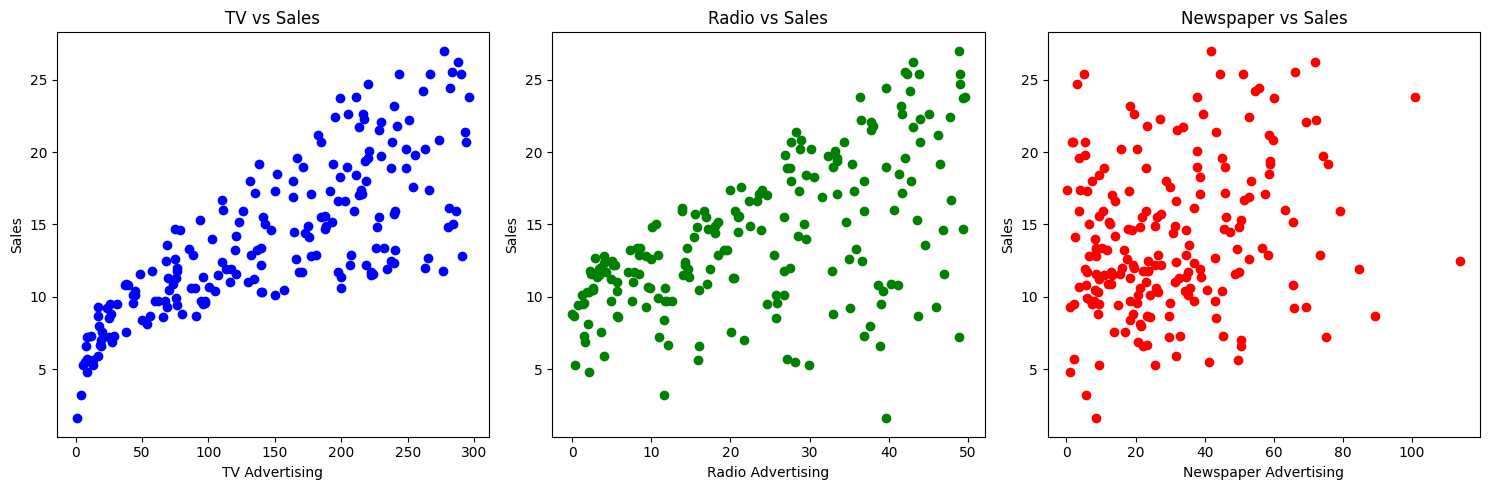

In [ ]:
data_viz(data) # data visualization
X=data[['TV', 'Radio', 'Newspaper']]
y=data['Sales']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
model=LinearRegression()# multi linear regression
model.fit(X_train, y_train) # model training
y_pred=model.predict(X_test)

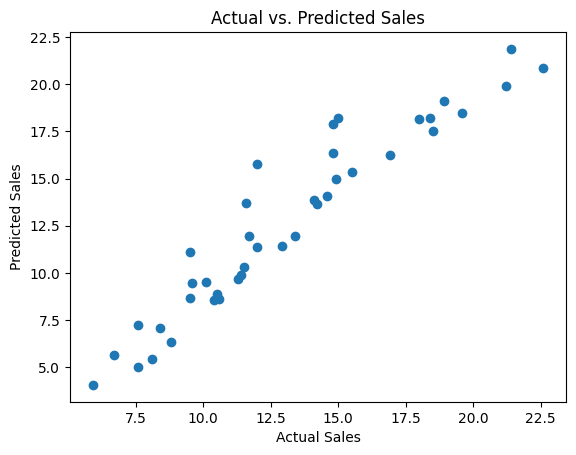

In [ ]:
act_pred_plot(y_test, y_pred)

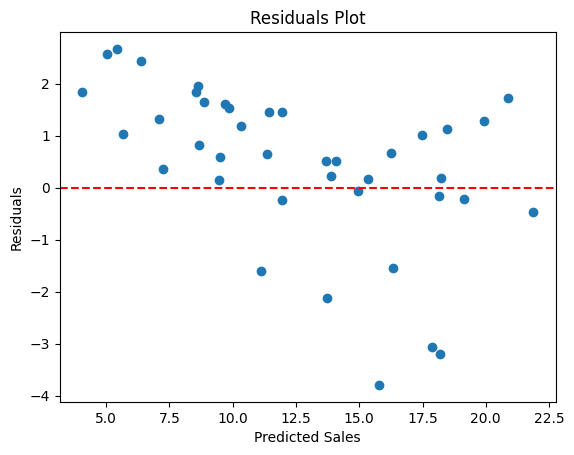

In [ ]:
residuals(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.4900348540140684


In [ ]:
new_row = {'TV': 270.1, 'Radio': 10.7, 'Newspaper': 42.1} # appending new values
X = X.append(new_row, ignore_index=True)

<ipython-input-14-55afbdf3353e>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.append(new_row, ignore_index=True)


In [ ]:
print(model.predict(np.expand_dims(X.iloc[-1].values.reshape(-1), axis=0))) # prediction

[17.45293509]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
